# [1] Sequential

In [46]:
# 모듈 불러오기
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
# 파라미터 설정
max_features = int(input('최대 단어 수 설정: ')) # 어휘 집합 수
max_length = int(input('문장 길이 설정: '))

최대 단어 수 설정: 6000
문장 길이 설정: 400


* `IMDB load_data`에서 `num_words`의 의미?
* 샘플 데이터 확인하면 단어 인덱스가 몇인지 구성 확인해 보자.

In [25]:
# 데이터 로드 및 확인
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(f"훈련 데이터: {X_train.shape}, 훈련 라벨: {y_train.shape}")
print(f"테스트 데이터: {y_train.shape}, 테스트 라벨: {y_test.shape}")
print()
print("훈련 데이터 샘플 확인")
print(X_train[0]) # 단어 인덱스 확인

훈련 데이터: (25000,), 훈련 라벨: (25000,)
테스트 데이터: (25000,), 테스트 라벨: (25000,)

훈련 데이터 샘플 확인
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16

* IMDB 데이터셋의 어휘 집합 확인
    - `get_word_index()` : dict 형태
* 인덱스 숫자, 단어 순서로 vocab_dict 구성


In [6]:
# 어휘집합
vocabulary = imdb.get_word_index() # dict
vocab_dict = dict((v, k) for k, v in vocabulary.items())

In [16]:
print('OOV' in imdb.get_word_index())

False


* padding, 문장 시작, OOV 넣어서 구성되어 있는 데이터

In [21]:
# IMDB 데이터셋 문장 decode
def decode_sent(sentences):
    '''
    - 0: padding, 1: start, 2: OOV
    - 실제 word index에서 3을 빼고, 없으면 '*'로 채운다.
    '''

    temp_sent = []
    for sent in sentences:
        temp = vocab_dict.get(sent-3, '*')
        temp_sent.append(temp)
    
    comb_sent = " ".join(temp_sent)

    return comb_sent

In [22]:
print(decode_sent(X_train[0])) # 문장 앞에 '*' 붙는다.

* this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert * is an amazing actor and now the same being director * father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for * and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also * to the two little boy's that played the * of norman and paul they were just brilliant children are often left out of the * list i think because the stars that play them all grown up are such a big * for the whole film but these children are amazing and should be praised for what they have done don't you think the

* 패딩

In [27]:
# 패딩
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)
print("========== 패딩 후 ==========")
print(f"훈련 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")

========== 패딩 후 ==========
훈련 데이터: (25000, 400)
테스트 데이터: (25000, 400)


In [29]:
# OOV 확인
for i in range(10):
    print(f"{i}번째 문장에서 OOV 개수: {(X_train[i] == 2).sum()}")

0번째 문장에서 OOV 개수: 7
1번째 문장에서 OOV 개수: 16
2번째 문장에서 OOV 개수: 3
3번째 문장에서 OOV 개수: 51
4번째 문장에서 OOV 개수: 3
5번째 문장에서 OOV 개수: 4
6번째 문장에서 OOV 개수: 14
7번째 문장에서 OOV 개수: 26
8번째 문장에서 OOV 개수: 8
9번째 문장에서 OOV 개수: 6


* 네트워크 구성

In [36]:
# 네트워크 파라미터
BATCH = int(input('배치 사이즈 설정: '))
EMBED_DIM = int(input('임베딩 차원 설정: '))
n_filters = int(input('컨볼루션 필터 개수 설정: '))
s_filters = int(input('컨볼루션 필터 사이즈 설정: '))
n_hidden = int(input('은닉 노드 수 설정: '))
EPOCHS = int(input('학습 횟수 설정: '))

배치 사이즈 설정: 32
임베딩 차원 설정: 60
컨볼루션 필터 개수 설정: 260
컨볼루션 필터 사이즈 설정: 3
은닉 노드 수 설정: 300
학습 횟수 설정: 1000


In [38]:
# 모델 구성
model = Sequential()

# 임베딩 
model.add(Embedding(input_dim=max_features,
                    output_dim=EMBED_DIM,
                    input_length=max_length))
model.add(Dropout(0.2))
# CNN
model.add(Conv1D(filters=n_filters,
                 kernel_size=s_filters,
                 strides=1,
                 padding='valid',
                 activation='relu'))
model.add(GlobalMaxPooling1D())
# FC 가기 전 은닉
model.add(Dense(n_hidden))
model.add(Dropout(0.5))
model.add(Activation('relu')) # 은닉층 활성화
# FC
model.add(Dense(1)) # sigmoid로 나온다
model.add(Activation('sigmoid'))

# 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam')
print("========== 모델 전체 구조 확인 ==========")
print(model.summary())

========== 모델 전체 구조 확인 ==========
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 60)           360000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400, 60)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 260)          47060     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 260)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               78300     
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
activation_2 (Activa

In [39]:
# 모델 학습
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

hist= model.fit(X_train, y_train,
                batch_size=BATCH,
                epochs=EPOCHS,
                validation_data=(X_test, y_test),
                callbacks=[es])

Epoch 1/1000
782/782 [==============================] - 7s 9ms/step - loss: 0.4191 - val_loss: 0.2829
Epoch 2/1000
782/782 [==============================] - 7s 9ms/step - loss: 0.2286 - val_loss: 0.2698
Epoch 3/1000
782/782 [==============================] - 7s 9ms/step - loss: 0.1526 - val_loss: 0.2848
Epoch 4/1000
782/782 [==============================] - 7s 9ms/step - loss: 0.0966 - val_loss: 0.3218
Epoch 5/1000
782/782 [==============================] - 7s 9ms/step - loss: 0.0648 - val_loss: 0.3658
Epoch 6/1000
782/782 [==============================] - 7s 9ms/step - loss: 0.0468 - val_loss: 0.4149
Epoch 7/1000
782/782 [==============================] - 7s 9ms/step - loss: 0.0365 - val_loss: 0.4609
Epoch 00007: early stopping


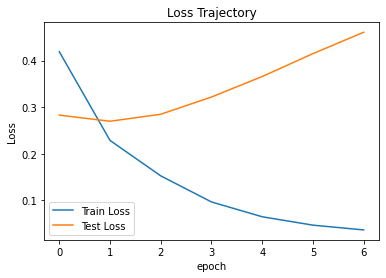

In [41]:
# plot loss
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Trajectory')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [49]:
# 예측 및 결과 확인: Deprecation Warning 주의
y_train_pred = model.predict_classes(X_train, batch_size=BATCH)
y_test_pred = model.predict_classes(X_test, batch_size=BATCH)
y_train_pred = np.reshape(y_train_pred, y_train.shape)
y_test_pred = np.reshape(y_test_pred, y_test.shape)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

Train Accuracy: 0.99884
Test Accuracy: 0.884


# [2] Functional API

최대 단어 수 설정: 6000
문장 길이 설정: 400
훈련 데이터: (25000,), 훈련 라벨: (25000,)
테스트 데이터: (25000,), 테스트 라벨: (25000,)

훈련 데이터 샘플 확인
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5,

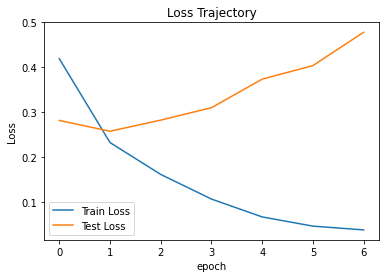


Train Accuracy: 0.99732
Test Accuracy: 0.87792


In [7]:
# 모듈 불러오기
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Embedding, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# 파라미터 설정
max_features = int(input('최대 단어 수 설정: ')) # 어휘 집합 수
max_length = int(input('문장 길이 설정: '))

# 데이터 로드 및 확인
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(f"훈련 데이터: {X_train.shape}, 훈련 라벨: {y_train.shape}")
print(f"테스트 데이터: {y_train.shape}, 테스트 라벨: {y_test.shape}")
print()
print("훈련 데이터 샘플 확인")
print(X_train[0]) # 단어 인덱스 확인
print()

# 어휘집합
vocabulary = imdb.get_word_index() # dict
vocab_dict = dict((v, k) for k, v in vocabulary.items())

# IMDB 데이터셋 문장 decode
def decode_sent(sentences, vocabulary=vocab_dict):
    '''
    - 0: padding, 1: start, 2: OOV
    - 실제 word index에서 3을 빼고, 없으면 '*'로 채운다.
    '''
    temp_sent = []
    for sent in sentences:
        temp = vocab_dict.get(sent-3, '*')
        temp_sent.append(temp)
    
    comb_sent = " ".join(temp_sent)

    return comb_sent

# 디코드해서 확인
print(decode_sent(X_train[0])) # 문장 앞에 '*' 붙는다.

# 패딩
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)
print("========== 패딩 후 ==========")
print(f"훈련 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")

# OOV 확인
for i in range(10):
    print(f"{i}번째 문장에서 OOV 개수: {(X_train[i] == 2).sum()}")
print()

# 네트워크 파라미터
BATCH = int(input('배치 사이즈 설정: '))
n_embed = int(input('임베딩 차원 설정: '))
n_filters = int(input('컨볼루션 필터 개수 설정: '))
s_filters = int(input('컨볼루션 필터 사이즈 설정: '))
n_hidden = int(input('은닉 노드 수 설정: '))
EPOCHS = int(input('학습 횟수 설정: '))

# 모델 레이어 구성
X_Input = Input(batch_shape=(None, max_length))
X_Embed = Embedding(input_dim=max_features, output_dim=n_embed, input_length=max_length)(X_Input)
X_Embed2 = Dropout(0.2)(X_Embed)
X_Conv = Conv1D(filters=n_filters, kernel_size=s_filters, strides=1, padding='valid', activation='relu')(X_Embed2)
X_Pool = GlobalMaxPooling1D()(X_Conv)
X_Dense = Dense(n_hidden, activation='relu')(X_Pool)
X_Dense2 = Dropout(0.5)(X_Dense)
y_output = Dense(1, activation='sigmoid')(X_Dense2)

# 모델 구성
model = Model(X_Input, y_output)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))
print("========== 모델 전체 구조 확인 ==========")
print(model.summary())
print()

# 모델 학습
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
hist= model.fit(X_train, y_train,
                batch_size=BATCH,
                epochs=EPOCHS,
                validation_data=(X_test, y_test),
                callbacks=[es])

# plot loss
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Trajectory')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()
print()

# 예측 및 결과 확인: Deprecation Warning 주의
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_pred = np.reshape(np.where(y_train_pred > 0.5, 1, 0), y_train.shape)
y_test_pred = np.reshape(np.where(y_test_pred > 0.5, 1, 0), y_test.shape)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

# [3] 코드 수정

- 문장 길이 확인하는 부분 추가
